In [47]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from hmmlearn import hmm
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Nạp và kiểm tra tệp CSV
df = pd.read_csv('Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', encoding='latin-1', sep=';')
print(df.head(20))

# Nạp tệp CSV để kiểm tra nội dung của nó
data = pd.read_csv("Gia SMP va SMPcap 2021(Giá thị trường SMP).csv", encoding='latin-1')
print(data.head())

# Hiển thị số lượng cột
print(f"Số lượng cột: {data.shape[1]}")

# Giả sử tệp có ít cột hơn, điều chỉnh tham số usecols
# Ví dụ: Giả sử các cột 1, 2, và 3 là những cột cần thiết
data2 = np.loadtxt("Gia SMP va SMPcap 2021(Giá thị trường SMP).csv", encoding='latin-1', delimiter=';', skiprows=1, usecols=(1, 2, 3), dtype=float)

print(data2)

          Ngày       1       2       3       4       5       6       7  \
0   01/01/2021   964.4   964.4   964.4   964.4   964.4   964.4   964.4   
1   01/02/2021  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7   
2   01/03/2021   988.4   988.4   988.4   988.4   988.4   988.4   988.4   
3   01/04/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
4   01/05/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   
5   01/06/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   
6   01/07/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   
7   01/08/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   
8   01/09/2021  1064.1  1064.1  1064.1  1064.1  1064.1  1064.1  1064.1   
9   01/10/2021   966.7   966.7   966.7   966.7   966.7   966.7   966.7   
10  01/11/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
11  01/12/2021  1066.6  1066.6  1066.6  1066.6  1066.6  1066.6  1066.6   
12   13/1/2021  1061.5  1061.5  1061.5

In [48]:
feats= ['Ngày','11','12','13']
df[feats].head()


,Ngày,11,12,13
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5


In [50]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# Giả sử df là DataFrame của bạn
# Chuyển đổi cột ngày tháng sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Chuyển đổi cột ngày tháng sang số (khoảng thời gian từ một mốc cố định)
df['date_numeric'] = (df['Ngày'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Loại bỏ cột ngày tháng gốc
df = df.drop(columns=['Ngày'])

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Khởi tạo HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)

# Huấn luyện HMM với dữ liệu quan sát
model.fit(df_scaled)

# In ra các tham số của mô hình sau khi huấn luyện
print("Start probabilities: ", model.startprob_)
print("Transition matrix: ", model.transmat_)
print("Means: ", model.means_)
print("Covariances: ", model.covars_)


Start probabilities:  [1. 0.]
Transition matrix:  [[0.34285714 0.65714286]
 [0.0668693  0.9331307 ]]
Means:  [[-0.62733555 -0.62730374 -0.62733555 -0.6273258  -0.62733336 -0.62733369
  -0.6273296  -0.62732585 -0.62278648 -0.62278268 -0.6198164  -0.61982019
  -0.61982979 -0.619802   -0.61990868 -0.61990065 -0.61992225 -0.61991617
  -0.62168888 -0.65880161 -0.71315963 -0.73995759 -0.72700625 -0.69468804
  -0.69022381 -0.68144221 -0.65146046 -0.63918658 -0.62763749 -0.618949
  -0.61296734 -0.61543622 -0.61541506 -0.61733919 -0.61728571 -0.59106751
  -0.61730956 -0.61730316 -0.61977491 -0.61980583 -0.6197841  -0.6197841
  -0.61980192 -0.61978889 -0.61988177 -0.61986357 -0.61982947 -0.61982697
   0.0789086 ]
 [ 0.06653559  0.06653221  0.06653559  0.06653455  0.06653536  0.06653539
   0.06653496  0.06653456  0.06605311  0.06605271  0.0657381   0.06573851
   0.06573952  0.06573658  0.06574789  0.06574704  0.06574933  0.06574868
   0.0659367   0.0698729   0.07563814  0.07848035  0.07710672  0.

In [51]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(df)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện
X, Z = model.sample(5)  # Lấy mẫu 5 quan sát mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)

Hidden states:  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Sampled observations:  [[-1.24314908 -1.24331688 -1.24314908 -1.24313739 -1.24314729 -1.24314791
  -1.2431424  -1.2431375  -1.26113776 -1.26113275 -1.23893551 -1.2389404
  -1.23895177 -1.23933036 -1.2393608  -1.23891202 -1.23884536 -1.23883848

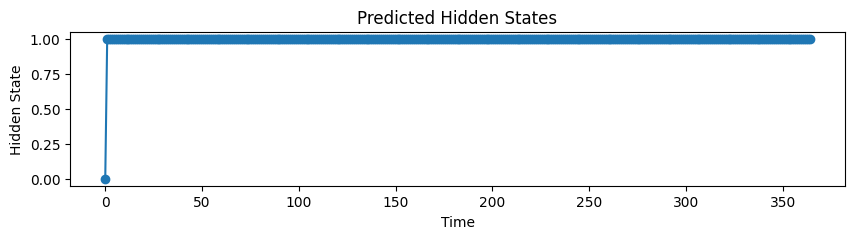

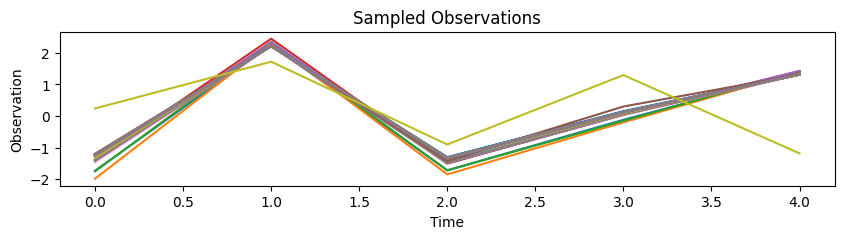

In [52]:
# Vẽ các trạng thái ẩn dự đoán
def plot_hidden_states(hidden_states, title):
    plt.figure(figsize=(10, 2))
    plt.plot(hidden_states, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Hidden State")
    plt.show()

plot_hidden_states(hidden_states, "Predicted Hidden States")

# Vẽ các quan sát mẫu
def plot_observations(observations, title):
    plt.figure(figsize=(10, 2)) 
    plt.plot(observations)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Observation")
    plt.show()

plot_observations(X, "Sampled Observations")

In [60]:
# df2 là dataframe gồm các cột 11 12 13
df2 = df[['11', '12', '13']]
df2.head()

,11,12,13
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1010.8,1010.8,1010.8
4,1061.5,1061.5,1061.5


In [55]:
# Chuẩn hóa ma trận chuyển tiếp
def normalize_transition_matrix(transition_matrix):
    return transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Định nghĩa hàm markov_chain
def markov_chain(transmat, state, state_names, samples):
    (rows, cols) = transmat.shape 
    rvs = [] 
    values = list(np.arange(0, rows))

    # Tạo các biến ngẫu nhiên cho mỗi hàng của ma trận chuyển tiếp
    for r in range(rows): 
        rv = stats.rv_discrete(name="row" + str(r), values=(values, transmat[r]))
        rvs.append(rv)

    # Bắt đầu từ trạng thái ban đầu và sau đó lấy mẫu biến ngẫu nhiên phù hợp
    # dựa trên trạng thái theo sau các chuyển tiếp
    states = [] 
    for n in range(samples): 
        state = rvs[state].rvs(size=1)[0]    
        states.append(state_names[state])
    return states

def compute_transition_matrix(df2):
    weather_states = []
    for column in df2.columns[1:]:
        for i in range(len(df2[column])-1):
            if df2[column][i] < df2[column][i+1]:
                weather_states.append('S')  # Nắng
            else:
                weather_states.append('C')  # Mây

    transition_counts = {'S': {'S': 0, 'C': 0}, 'C': {'S': 0, 'C': 0}}
    for i in range(len(weather_states)-1):
        from_state = weather_states[i]
        to_state = weather_states[i+1]
        transition_counts[from_state][to_state] += 1

    transition_matrix = np.zeros((2, 2))
    for i, from_state in enumerate(['S', 'C']):
        for j, to_state in enumerate(['S', 'C']):
            transition_matrix[i, j] = transition_counts[from_state][to_state] / weather_states.count(from_state)

    return transition_matrix

# Tính toán ma trận chuyển tiếp từ dữ liệu thời tiết
transmat = compute_transition_matrix(df2)
transmat = normalize_transition_matrix(transmat)  # Chuẩn hóa ma trận chuyển tiếp

# Gọi hàm markov_chain để tạo mẫu dữ liệu thời tiết dựa trên ma trận chuyển tiếp
samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# In ra mẫu dữ liệu thời tiết
print(samples)


['C', 'S', 'C', 'S', 'C', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'S', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'C',

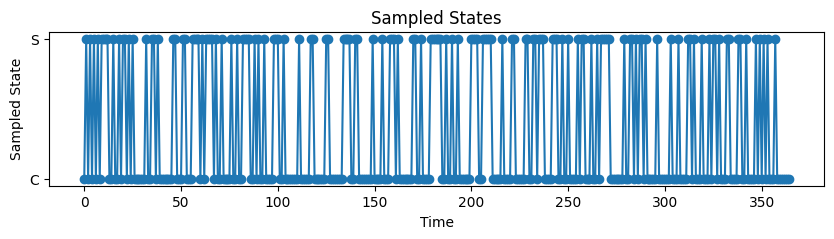

In [56]:
# Hàm vẽ biểu đồ cho dữ liệu mẫu dự đoán
def plot_samples(samples, title):
    plt.figure(figsize=(10, 2))
    plt.plot(samples, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Sampled State")
    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_samples(samples, "Sampled States")

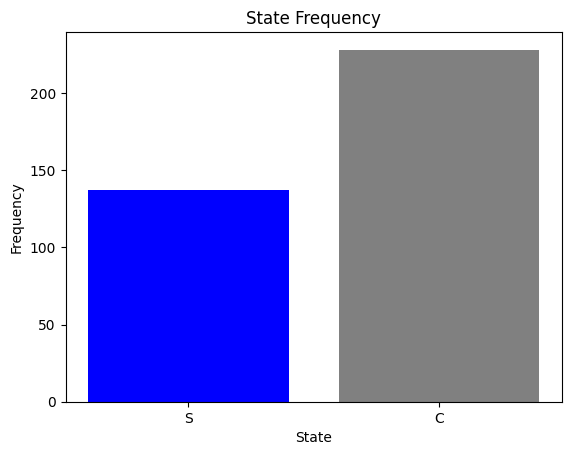

In [57]:
# Hàm vẽ biểu đồ cho dữ liệu samples
def plot_samples(samples):
    # Đếm số lần xuất hiện của mỗi trạng thái
    counts = {'S': 0, 'C': 0}
    for sample in samples:
        counts[sample] += 1

    # Vẽ biểu đồ cột
    plt.bar(counts.keys(), counts.values(), color=['blue', 'grey'])
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title('State Frequency')
    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_samples(samples)

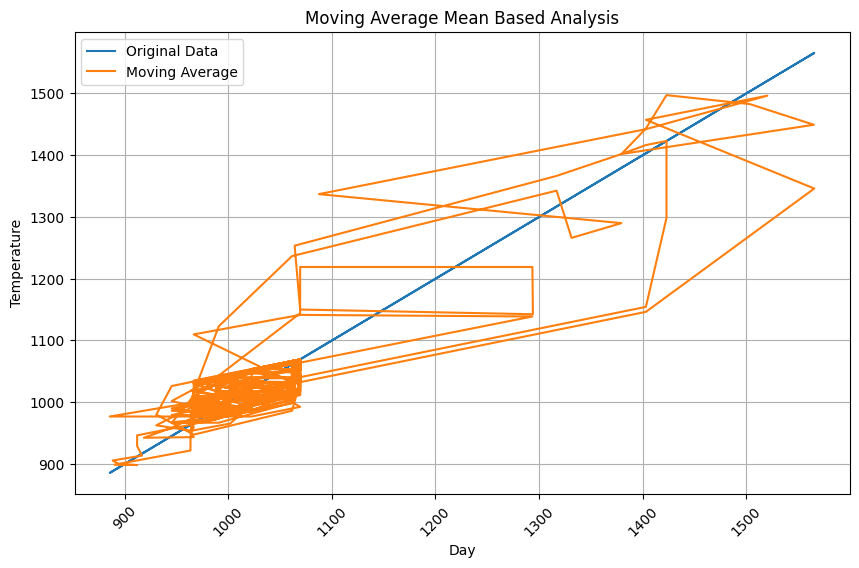

In [43]:


# Chọn cột dữ liệu để phân tích
column_name = '11'
# Áp dụng moving average
window_size = 3  # Kích thước cửa sổ moving average
df2['moving_average'] = df2[column_name].rolling(window=window_size).mean()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df2['11'], df2[column_name], label='Original Data')
plt.plot(df2['11'], df2['moving_average'], label='Moving Average')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Moving Average Mean Based Analysis')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()